In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Note: here include_top = False meanse the bottleneck layers will be not included which means
# the final dense or fully connected layers will not be included thats it nothing more than that.

58889256/58889256 [==============================] - 3s 0us/step


In [3]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
# Now that we freeze the all layers this is a must step else all the layers will go to training

In [4]:
# Create a new model by adding the last bottleneck layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Load and preprocess your data (replace with your own data loading/preprocessing code)
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="v_data/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="v_data/test", target_size=(224,224))

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
# Train the model and collect history
history = model.fit(traindata, validation_data=testdata, epochs=30, batch_size=10)

Epoch 1/30
13/13 [==============================] - 20s 511ms/step - loss: 1.3625 - accuracy: 0.9575 - val_loss: 4.8832 - val_accuracy: 0.9500
Epoch 2/30
13/13 [==============================] - 2s 167ms/step - loss: 0.7529 - accuracy: 0.9925 - val_loss: 4.5946 - val_accuracy: 0.9800
Epoch 3/30
13/13 [==============================] - 2s 164ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.0150 - val_accuracy: 0.9800
Epoch 4/30
13/13 [==============================] - 2s 164ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.8521 - val_accuracy: 0.9800
Epoch 5/30
13/13 [==============================] - 2s 170ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.8051 - val_accuracy: 0.9800
Epoch 6/30
13/13 [==============================] - 2s 172ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.7918 - val_accuracy: 0.9800
Epoch 7/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.7881 - val_ac

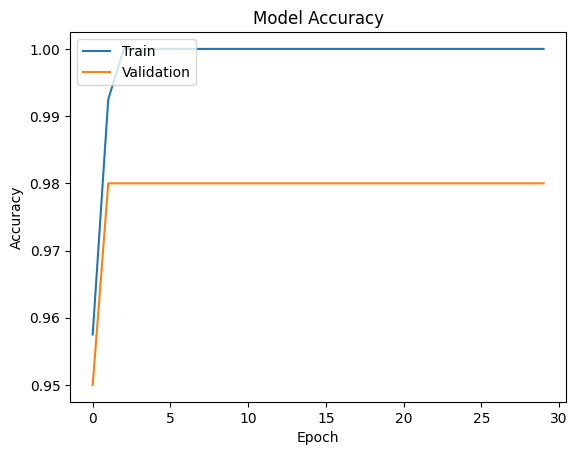

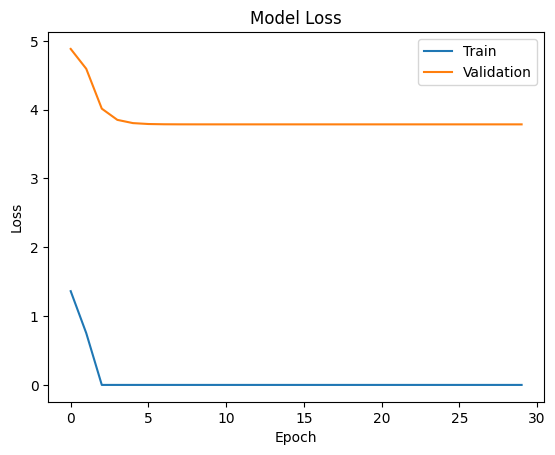

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
# the above model is such a dumb model as its overfitting like crazy now lets optimize the code to get the best fit model

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Epoch 1/50
40/40 [==============================] - ETA: 0s - loss: 1.2868 - accuracy: 0.7600
Epoch 1: accuracy improved from -inf to 0.76000, saving model to vgg16_1.h5
40/40 [==============================] - 8s 161ms/step - loss: 1.2868 - accuracy: 0.7600 - val_loss: 0.4749 - val_accuracy: 0.8900
Epoch 2/50
40/40 [==============================] - ETA: 0s - loss: 0.2898 - accuracy: 0.9225
Epoch 2: accuracy improved from 0.76000 to 0.92250, saving model to vgg16_1.h5
40/40 [==============================] - 8s 190ms/step - loss: 0.2898 - accuracy: 0.9225 - val_loss: 0.1039 - val_accuracy: 0.9700
Epoch 3/50
40/40 [==============================] - ETA: 0s - loss: 0.2015 - accuracy: 0.9375
Epoch 3: accuracy improved from 0.92250 to 0.93750, saving model to vgg16_1.h5
40/40 [==============================] - 6s 160ms/step - loss: 0.2015 - accuracy: 0.9375 - val_loss: 0.0747 - val_accuracy: 0.9700
Epoch 4/50
40/40 [==============================] - ETA: 0s - loss: 0.1609 - accuracy: 0.94

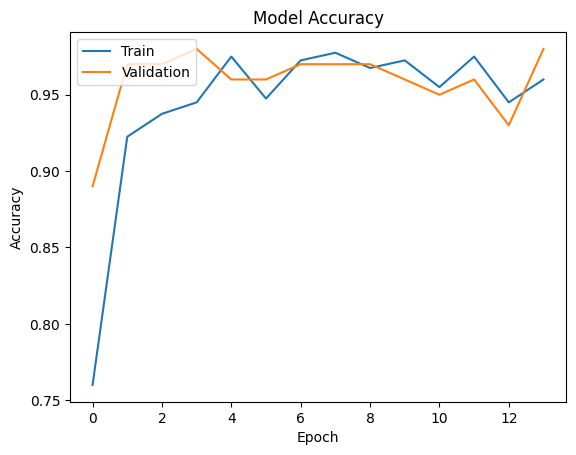

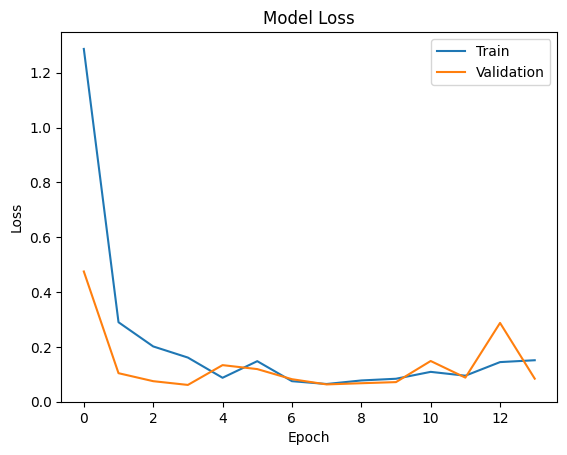

In [15]:
# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout regularization
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess your data (replace with your own data loading/preprocessing code)
train_data = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=20,  # Random rotation between 0 and 20 degrees
    width_shift_range=0.2,  # Random width shift between -0.2 and +0.2
    height_shift_range=0.2,  # Random height shift between -0.2 and +0.2
    zoom_range=0.2,  # Random zoom between 0.8 and 1.2
    horizontal_flip=True  # Randomly flip images horizontally
)
validation_data = ImageDataGenerator(rescale=1./255)  # Only rescale validation data

train_generator = train_data.flow_from_directory(
    directory="v_data/train",
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical'
)
validation_generator = validation_data.flow_from_directory(
    directory="v_data/test",
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical'
)

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Saving the Checkpoints
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    batch_size=10,
    callbacks=[early_stopping, checkpoint]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



In [16]:
# still there's room for improvement but the above model is not bad

In [27]:
# Its testing time !!!!!!!!...........


from tensorflow.keras.preprocessing import image

image_path = "plane.jpeg"  # Replace with the actual path to your JPEG file
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = x / 255.0  # Normalize the pixel values (assuming your model was trained with normalized data)
x = np.expand_dims(x, axis=0)  # Add an extra dimension to represent the batch size
prediction = model.predict(x)
class_labels = ['cars', 'planes']
predicted_class = np.argmax(prediction)
predicted_label = class_labels[predicted_class]
print(f"This is a {predicted_label} with confidence score of {np.max(prediction)}")

1/1 [==============================] - 0s 19ms/step
This is a planes with confidence score of 0.8214515447616577
